In [1]:
import plaidml.keras
#plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import MaxPool2D


from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical



Using plaidml.keras.backend backend.


In [3]:
import pandas as pd 
import numpy as np

In [4]:
m_data= pd.read_csv('ISIC_2019_Training_GroundTruth.csv')



In [5]:
m_data

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
m_data.NV.value_counts()

1.0    12875
0.0    12456
Name: NV, dtype: int64

In [7]:
m_data.MEL.value_counts()

0.0    20809
1.0     4522
Name: MEL, dtype: int64

In [8]:
m_data.BCC.value_counts()

0.0    22008
1.0     3323
Name: BCC, dtype: int64

In [9]:
m_data.AK.value_counts()

0.0    24464
1.0      867
Name: AK, dtype: int64

In [10]:
m_data.BKL.value_counts()

0.0    22707
1.0     2624
Name: BKL, dtype: int64

In [11]:
m_data.rename(columns={'image':'image_id'},inplace=True)

In [12]:
m_data

,image_id,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import os 

In [14]:
m_data['cell_type']=m_data['UNK']

In [15]:
for index,row in m_data.iterrows():
    m_data['cell_type'][index]=(row==1.0).idxmax(axis=1)
    

/Users/onurbilginer/anaconda3/envs/plaidenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/onurbilginer/anaconda3/envs/plaidenv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
m_data=m_data.drop(['MEL', 'NV','AK','BCC','BKL','DF','VASC','SCC','UNK'], axis=1)

In [17]:
m_data    

,image_id,cell_type
0,ISIC_0000000,NV
1,ISIC_0000001,NV
2,ISIC_0000002,MEL
3,ISIC_0000003,NV
4,ISIC_0000004,MEL
...,...,...
25326,ISIC_0073247,BCC
25327,ISIC_0073248,BKL
25328,ISIC_0073249,MEL
25329,ISIC_0073251,NV


In [18]:
m_data=m_data[m_data.cell_type!='UNK']
m_data=m_data[m_data.cell_type!='AK']

In [19]:
m_data=m_data[m_data.cell_type!='DF']
m_data=m_data[m_data.cell_type!='VASC']
m_data=m_data[m_data.cell_type!='SCC']

In [20]:
m_data.cell_type.value_counts()

NV     12875
MEL     4522
BCC     3323
BKL     2624
Name: cell_type, dtype: int64

In [21]:
m_data

,image_id,cell_type
0,ISIC_0000000,NV
1,ISIC_0000001,NV
2,ISIC_0000002,MEL
3,ISIC_0000003,NV
4,ISIC_0000004,MEL
...,...,...
25326,ISIC_0073247,BCC
25327,ISIC_0073248,BKL
25328,ISIC_0073249,MEL
25329,ISIC_0073251,NV


In [22]:
m_data['cell_type_idx'] = pd.Categorical(m_data['cell_type']).codes

In [23]:
m_data

,image_id,cell_type,cell_type_idx
0,ISIC_0000000,NV,3
1,ISIC_0000001,NV,3
2,ISIC_0000002,MEL,2
3,ISIC_0000003,NV,3
4,ISIC_0000004,MEL,2
...,...,...,...
25326,ISIC_0073247,BCC,0
25327,ISIC_0073248,BKL,1
25328,ISIC_0073249,MEL,2
25329,ISIC_0073251,NV,3


In [24]:
folder = os.listdir('ISIC_2019_Training_Input/')
m_data['path']= m_data['image_id']

In [25]:
m_data

,image_id,cell_type,cell_type_idx,path
0,ISIC_0000000,NV,3,ISIC_0000000
1,ISIC_0000001,NV,3,ISIC_0000001
2,ISIC_0000002,MEL,2,ISIC_0000002
3,ISIC_0000003,NV,3,ISIC_0000003
4,ISIC_0000004,MEL,2,ISIC_0000004
...,...,...,...,...
25326,ISIC_0073247,BCC,0,ISIC_0073247
25327,ISIC_0073248,BKL,1,ISIC_0073248
25328,ISIC_0073249,MEL,2,ISIC_0073249
25329,ISIC_0073251,NV,3,ISIC_0073251


In [26]:
len(folder)

25333

In [27]:
def path(x):
    
    file=x+'.jpg'
    return os.path.join('ISIC_2019_Training_Input/',file)
    
    
        

In [28]:
m_data['path'] = m_data['path'].apply(path)

In [29]:
m_data

,image_id,cell_type,cell_type_idx,path
0,ISIC_0000000,NV,3,ISIC_2019_Training_Input/ISIC_0000000.jpg
1,ISIC_0000001,NV,3,ISIC_2019_Training_Input/ISIC_0000001.jpg
2,ISIC_0000002,MEL,2,ISIC_2019_Training_Input/ISIC_0000002.jpg
3,ISIC_0000003,NV,3,ISIC_2019_Training_Input/ISIC_0000003.jpg
4,ISIC_0000004,MEL,2,ISIC_2019_Training_Input/ISIC_0000004.jpg
...,...,...,...,...
25326,ISIC_0073247,BCC,0,ISIC_2019_Training_Input/ISIC_0073247.jpg
25327,ISIC_0073248,BKL,1,ISIC_2019_Training_Input/ISIC_0073248.jpg
25328,ISIC_0073249,MEL,2,ISIC_2019_Training_Input/ISIC_0073249.jpg
25329,ISIC_0073251,NV,3,ISIC_2019_Training_Input/ISIC_0073251.jpg


In [30]:
df_nv = m_data[m_data['cell_type']=='NV']
m_data1=m_data[m_data['cell_type']!='NV']

from sklearn.utils import shuffle
df_nv=shuffle(df_nv)
df_nv=df_nv.head(4500)
df_nv=df_nv.reset_index(drop=True)

m_data = pd.concat([df_nv,m_data1])



In [31]:
m_data.cell_type.value_counts()

MEL    4522
NV     4500
BCC    3323
BKL    2624
Name: cell_type, dtype: int64

In [32]:
df_nv=m_data[m_data['cell_type']=='NV']
df_nv=shuffle(df_nv)
df_nv=df_nv.head(100)
df_nv=df_nv.reset_index(drop=True)

df_mel=m_data[m_data['cell_type']=='MEL']
df_mel=shuffle(df_mel)
df_mel=df_mel.head(100)
df_mel=df_mel.reset_index(drop=True)

df_bcc=m_data[m_data['cell_type']=='BCC']
df_bcc=shuffle(df_bcc)
df_bcc=df_bcc.head(100)
df_bcc=df_bcc.reset_index(drop=True)

df_bkl=m_data[m_data['cell_type']=='BKL']
df_bkl=shuffle(df_bkl)
df_bkl=df_bkl.head(100)
df_bkl=df_bkl.reset_index(drop=True)




df_test = pd.concat([df_bcc,df_bkl,df_mel,df_nv])
df_test=shuffle(df_test)
df_test=df_test.reset_index(drop=True)

In [33]:
df_test.cell_type.value_counts()

BCC    100
MEL    100
NV     100
BKL    100
Name: cell_type, dtype: int64

In [34]:
df_test

,image_id,cell_type,cell_type_idx,path
0,ISIC_0071401,MEL,2,ISIC_2019_Training_Input/ISIC_0071401.jpg
1,ISIC_0057250,BKL,1,ISIC_2019_Training_Input/ISIC_0057250.jpg
2,ISIC_0028584,MEL,2,ISIC_2019_Training_Input/ISIC_0028584.jpg
3,ISIC_0070081,BCC,0,ISIC_2019_Training_Input/ISIC_0070081.jpg
4,ISIC_0058310,BCC,0,ISIC_2019_Training_Input/ISIC_0058310.jpg
...,...,...,...,...
395,ISIC_0065057,MEL,2,ISIC_2019_Training_Input/ISIC_0065057.jpg
396,ISIC_0069380,MEL,2,ISIC_2019_Training_Input/ISIC_0069380.jpg
397,ISIC_0031783,BKL,1,ISIC_2019_Training_Input/ISIC_0031783.jpg
398,ISIC_0066646,BKL,1,ISIC_2019_Training_Input/ISIC_0066646.jpg


In [35]:
cols=list(m_data.columns)

In [36]:
df_all = m_data.merge(df_test.drop_duplicates(), on=cols, 
                   how='left', indicator=True)

In [37]:
m_data=df_all[df_all['_merge']=='left_only']

In [38]:
del m_data['_merge']

In [39]:
m_data

,image_id,cell_type,cell_type_idx,path
0,ISIC_0032000,NV,3,ISIC_2019_Training_Input/ISIC_0032000.jpg
1,ISIC_0032407,NV,3,ISIC_2019_Training_Input/ISIC_0032407.jpg
2,ISIC_0025860,NV,3,ISIC_2019_Training_Input/ISIC_0025860.jpg
3,ISIC_0028474,NV,3,ISIC_2019_Training_Input/ISIC_0028474.jpg
4,ISIC_0057814,NV,3,ISIC_2019_Training_Input/ISIC_0057814.jpg
...,...,...,...,...
14964,ISIC_0073246,BCC,0,ISIC_2019_Training_Input/ISIC_0073246.jpg
14965,ISIC_0073247,BCC,0,ISIC_2019_Training_Input/ISIC_0073247.jpg
14966,ISIC_0073248,BKL,1,ISIC_2019_Training_Input/ISIC_0073248.jpg
14967,ISIC_0073249,MEL,2,ISIC_2019_Training_Input/ISIC_0073249.jpg


In [40]:
df_test

,image_id,cell_type,cell_type_idx,path
0,ISIC_0071401,MEL,2,ISIC_2019_Training_Input/ISIC_0071401.jpg
1,ISIC_0057250,BKL,1,ISIC_2019_Training_Input/ISIC_0057250.jpg
2,ISIC_0028584,MEL,2,ISIC_2019_Training_Input/ISIC_0028584.jpg
3,ISIC_0070081,BCC,0,ISIC_2019_Training_Input/ISIC_0070081.jpg
4,ISIC_0058310,BCC,0,ISIC_2019_Training_Input/ISIC_0058310.jpg
...,...,...,...,...
395,ISIC_0065057,MEL,2,ISIC_2019_Training_Input/ISIC_0065057.jpg
396,ISIC_0069380,MEL,2,ISIC_2019_Training_Input/ISIC_0069380.jpg
397,ISIC_0031783,BKL,1,ISIC_2019_Training_Input/ISIC_0031783.jpg
398,ISIC_0066646,BKL,1,ISIC_2019_Training_Input/ISIC_0066646.jpg


In [41]:
m_data.cell_type.value_counts()

MEL    4422
NV     4400
BCC    3223
BKL    2524
Name: cell_type, dtype: int64

In [43]:
from PIL import Image
from sklearn.decomposition import PCA

In [43]:
m_data['image'] = m_data['path'].map(lambda x: np.asarray(Image.open(x).resize((112,112))))

/Users/onurbilginer/anaconda3/envs/plaidenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/onurbilginer/anaconda3/envs/plaidenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_test['image'] = df_test['path'].map(lambda x: np.asarray(Image.open(x).resize((112,112))))

In [45]:
m_data.set_index("image_id", inplace = True)

In [46]:
m_data

,cell_type,cell_type_idx,path,image
image_id,,,,
ISIC_0027237,NV,3,ISIC_2019_Training_Input/ISIC_0027237.jpg,"[[[37, 20, 28], [123, 109, 80], [76, 43, 38], ..."
ISIC_0056850,NV,3,ISIC_2019_Training_Input/ISIC_0056850.jpg,"[[[154, 148, 160], [149, 143, 157], [145, 139,..."
ISIC_0028111,NV,3,ISIC_2019_Training_Input/ISIC_0028111.jpg,"[[[239, 167, 155], [241, 164, 156], [244, 170,..."
ISIC_0000499,NV,3,ISIC_2019_Training_Input/ISIC_0000499.jpg,"[[[199, 178, 185], [199, 180, 184], [198, 179,..."
ISIC_0061560,NV,3,ISIC_2019_Training_Input/ISIC_0061560.jpg,"[[[6, 6, 6], [15, 15, 15], [27, 25, 26], [39, ..."
...,...,...,...,...
ISIC_0073246,BCC,0,ISIC_2019_Training_Input/ISIC_0073246.jpg,"[[[1, 1, 1], [1, 1, 1], [0, 0, 0], [2, 2, 2], ..."
ISIC_0073247,BCC,0,ISIC_2019_Training_Input/ISIC_0073247.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
ISIC_0073248,BKL,1,ISIC_2019_Training_Input/ISIC_0073248.jpg,"[[[90, 85, 89], [92, 87, 91], [99, 93, 97], [1..."


,cell_type,cell_type_idx,path,image
image_id,,,,
ISIC_0027237,NV,3,ISIC_2019_Training_Input/ISIC_0027237.jpg,"[[[37, 20, 28], [123, 109, 80], [76, 43, 38], ..."
ISIC_0056850,NV,3,ISIC_2019_Training_Input/ISIC_0056850.jpg,"[[[154, 148, 160], [149, 143, 157], [145, 139,..."
ISIC_0028111,NV,3,ISIC_2019_Training_Input/ISIC_0028111.jpg,"[[[239, 167, 155], [241, 164, 156], [244, 170,..."
ISIC_0000499,NV,3,ISIC_2019_Training_Input/ISIC_0000499.jpg,"[[[199, 178, 185], [199, 180, 184], [198, 179,..."
ISIC_0061560,NV,3,ISIC_2019_Training_Input/ISIC_0061560.jpg,"[[[6, 6, 6], [15, 15, 15], [27, 25, 26], [39, ..."
...,...,...,...,...
ISIC_0073246,BCC,0,ISIC_2019_Training_Input/ISIC_0073246.jpg,"[[[1, 1, 1], [1, 1, 1], [0, 0, 0], [2, 2, 2], ..."
ISIC_0073247,BCC,0,ISIC_2019_Training_Input/ISIC_0073247.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
ISIC_0073248,BKL,1,ISIC_2019_Training_Input/ISIC_0073248.jpg,"[[[90, 85, 89], [92, 87, 91], [99, 93, 97], [1..."


In [47]:
def binary(x):
    if x==3 :
        return 0
    elif x==1:
        re
    else:
        return 1
    
#m_data['bin_cell_type']=m_data['cell_type_idx'].apply(binary)

In [48]:
binary(3)

0

0

In [49]:
m_data.image[0].shape

(112, 112, 3)

(112, 112, 3)

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

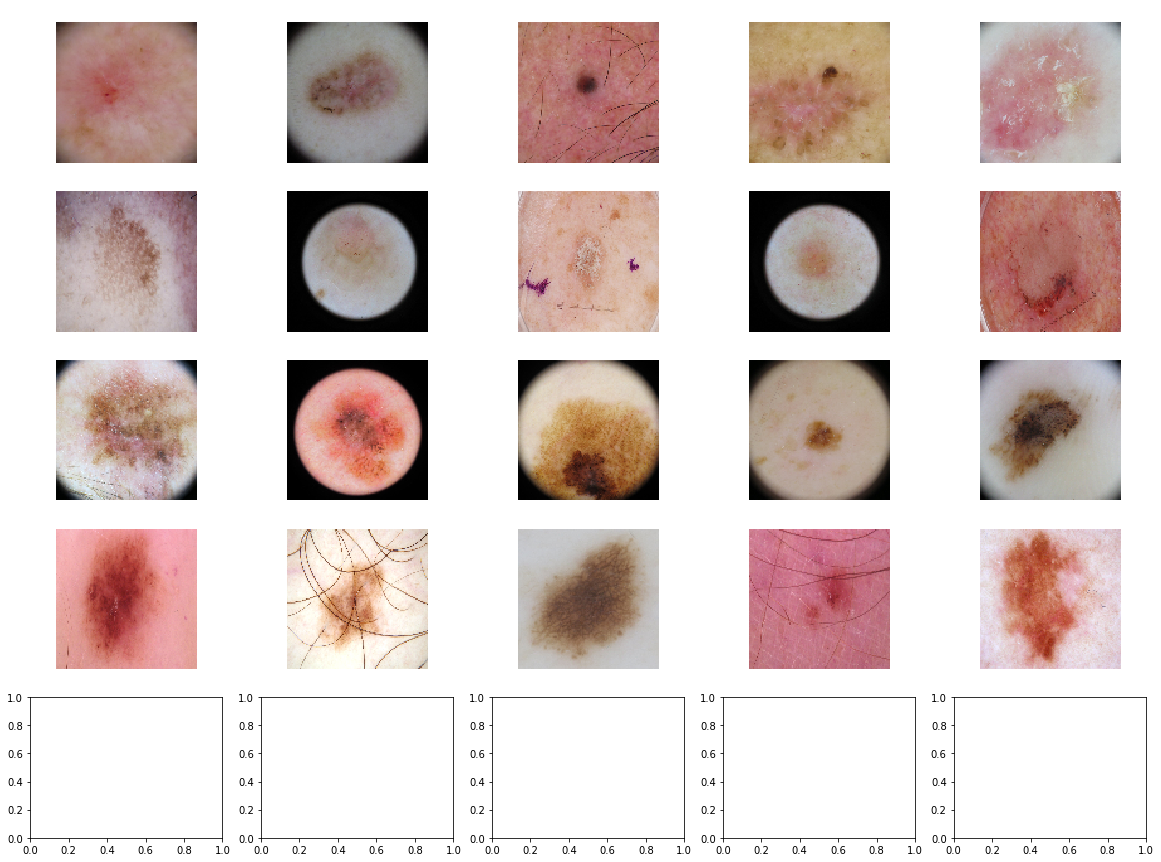

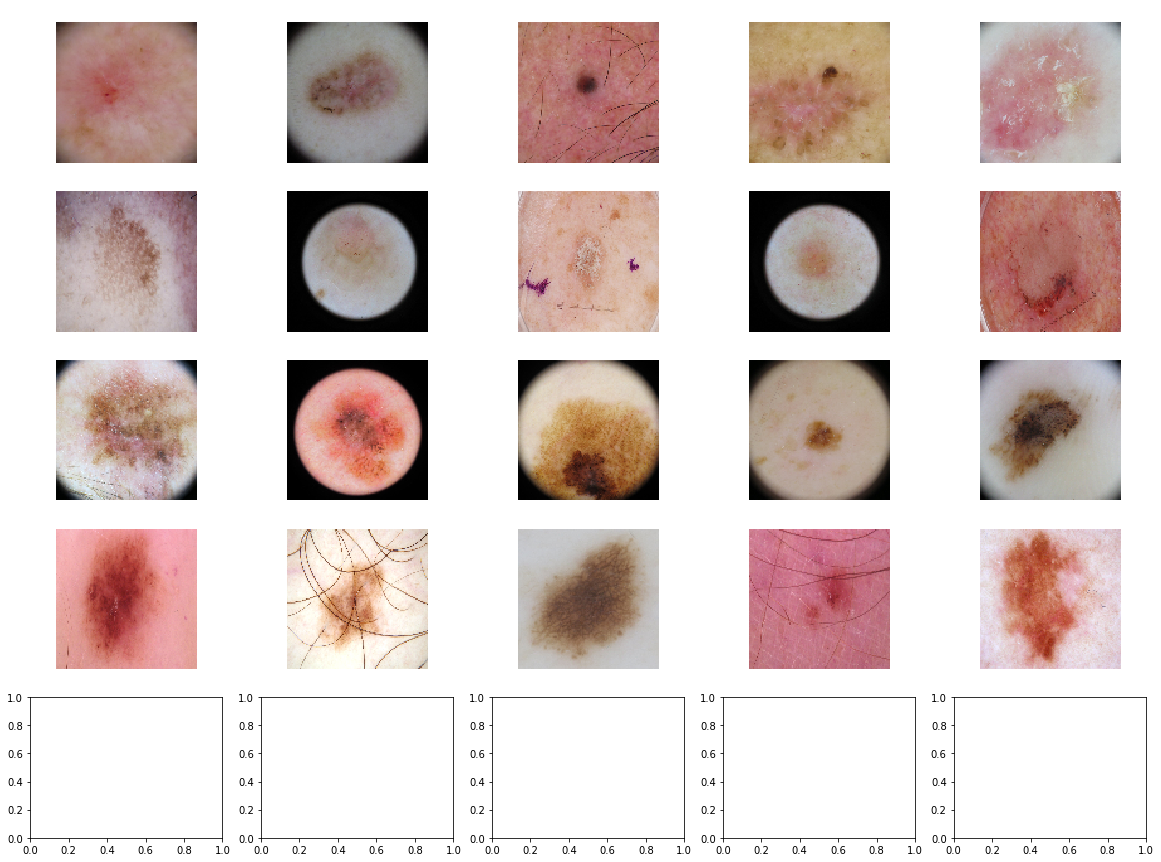

In [51]:
n_samples = 5
fig, m_axs = plt.subplots(5, n_samples, figsize = (4*n_samples, 3*5))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         m_data.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name,color='w')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [52]:
m_data['image'].map(lambda x: x.shape).value_counts()

(112, 112, 3)    14569
Name: image, dtype: int64

(112, 112, 3)    14569
Name: image, dtype: int64

In [53]:
m_data.cell_type.value_counts()

MEL    4422
NV     4400
BCC    3223
BKL    2524
Name: cell_type, dtype: int64

MEL    4422
NV     4400
BCC    3223
BKL    2524
Name: cell_type, dtype: int64

In [54]:
df_test.cell_type.value_counts()

BCC    100
NV     100
MEL    100
BKL    100
Name: cell_type, dtype: int64

BCC    100
NV     100
MEL    100
BKL    100
Name: cell_type, dtype: int64

In [55]:
df_train=m_data

In [56]:
df_train = shuffle(df_train)
df_test = shuffle(df_test)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [57]:
y_train= df_train['cell_type_idx']
y_test = df_test['cell_type_idx']

In [58]:
df_train

,cell_type,cell_type_idx,path,image
image_id,,,,
ISIC_0024509,NV,3,ISIC_2019_Training_Input/ISIC_0024509.jpg,"[[[235, 140, 148], [238, 142, 146], [239, 144,..."
ISIC_0025317,MEL,2,ISIC_2019_Training_Input/ISIC_0025317.jpg,"[[[110, 47, 56], [150, 75, 82], [169, 98, 102]..."
ISIC_0070467,BKL,1,ISIC_2019_Training_Input/ISIC_0070467.jpg,"[[[1, 1, 0], [1, 3, 0], [0, 2, 1], [0, 2, 1], ..."
ISIC_0010089,MEL,2,ISIC_2019_Training_Input/ISIC_0010089.jpg,"[[[123, 112, 82], [124, 113, 81], [125, 112, 8..."
ISIC_0068570,BCC,0,ISIC_2019_Training_Input/ISIC_0068570.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...,...
ISIC_0026059,NV,3,ISIC_2019_Training_Input/ISIC_0026059.jpg,"[[[230, 150, 161], [233, 152, 159], [230, 149,..."
ISIC_0063236,BCC,0,ISIC_2019_Training_Input/ISIC_0063236.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
ISIC_0069094,BCC,0,ISIC_2019_Training_Input/ISIC_0069094.jpg,"[[[167, 147, 136], [169, 149, 142], [174, 153,..."


,cell_type,cell_type_idx,path,image
image_id,,,,
ISIC_0024509,NV,3,ISIC_2019_Training_Input/ISIC_0024509.jpg,"[[[235, 140, 148], [238, 142, 146], [239, 144,..."
ISIC_0025317,MEL,2,ISIC_2019_Training_Input/ISIC_0025317.jpg,"[[[110, 47, 56], [150, 75, 82], [169, 98, 102]..."
ISIC_0070467,BKL,1,ISIC_2019_Training_Input/ISIC_0070467.jpg,"[[[1, 1, 0], [1, 3, 0], [0, 2, 1], [0, 2, 1], ..."
ISIC_0010089,MEL,2,ISIC_2019_Training_Input/ISIC_0010089.jpg,"[[[123, 112, 82], [124, 113, 81], [125, 112, 8..."
ISIC_0068570,BCC,0,ISIC_2019_Training_Input/ISIC_0068570.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...,...
ISIC_0026059,NV,3,ISIC_2019_Training_Input/ISIC_0026059.jpg,"[[[230, 150, 161], [233, 152, 159], [230, 149,..."
ISIC_0063236,BCC,0,ISIC_2019_Training_Input/ISIC_0063236.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
ISIC_0069094,BCC,0,ISIC_2019_Training_Input/ISIC_0069094.jpg,"[[[167, 147, 136], [169, 149, 142], [174, 153,..."


In [59]:
y_train

image_id
ISIC_0024509    3
ISIC_0025317    2
ISIC_0070467    1
ISIC_0010089    2
ISIC_0068570    0
               ..
ISIC_0026059    3
ISIC_0063236    0
ISIC_0069094    0
ISIC_0067914    2
ISIC_0066406    0
Name: cell_type_idx, Length: 14569, dtype: int8

image_id
ISIC_0024509    3
ISIC_0025317    2
ISIC_0070467    1
ISIC_0010089    2
ISIC_0068570    0
               ..
ISIC_0026059    3
ISIC_0063236    0
ISIC_0069094    0
ISIC_0067914    2
ISIC_0066406    0
Name: cell_type_idx, Length: 14569, dtype: int8

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42

In [60]:
y_train.value_counts()

2    4422
3    4400
0    3223
1    2524
Name: cell_type_idx, dtype: int64

2    4422
3    4400
0    3223
1    2524
Name: cell_type_idx, dtype: int64

In [61]:
x_train = np.asarray(df_train['image'].tolist())
x_test = np.asarray(df_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [62]:
x_train

array([[[[ 1.5676746 , -0.05522369,  0.08144143],
         [ 1.61892401, -0.02105741,  0.04727515],
         [ 1.63600715,  0.01310887,  0.08144143],
         ...,
         [ 1.73850599,  0.2864391 ,  0.3718548 ],
         [ 1.68725657,  0.30352224,  0.42310422],
         [ 1.63600715,  0.32060538,  0.4572705 ]],

        [[ 1.5676746 , -0.03814055, -0.03814055],
         [ 1.5676746 , -0.05522369, -0.12355625],
         [ 1.60184088, -0.00397427,  0.01310887],
         ...,
         [ 1.72142285,  0.23518968,  0.38893794],
         [ 1.73850599,  0.32060538,  0.4572705 ],
         [ 1.65309029,  0.26935596,  0.42310422]],

        [[ 1.5676746 ,  0.03019201,  0.01310887],
         [ 1.46517576, -0.03814055, -0.10647311],
         [ 1.58475774,  0.03019201,  0.01310887],
         ...,
         [ 1.70433971,  0.20102341,  0.44018736],
         [ 1.63600715,  0.2864391 ,  0.38893794],
         [ 1.65309029,  0.33768852,  0.47435364]],

        ...,

        [[ 1.3114275 ,  0.01310887, -0

array([[[[ 1.5676746 , -0.05522369,  0.08144143],
         [ 1.61892401, -0.02105741,  0.04727515],
         [ 1.63600715,  0.01310887,  0.08144143],
         ...,
         [ 1.73850599,  0.2864391 ,  0.3718548 ],
         [ 1.68725657,  0.30352224,  0.42310422],
         [ 1.63600715,  0.32060538,  0.4572705 ]],

        [[ 1.5676746 , -0.03814055, -0.03814055],
         [ 1.5676746 , -0.05522369, -0.12355625],
         [ 1.60184088, -0.00397427,  0.01310887],
         ...,
         [ 1.72142285,  0.23518968,  0.38893794],
         [ 1.73850599,  0.32060538,  0.4572705 ],
         [ 1.65309029,  0.26935596,  0.42310422]],

        [[ 1.5676746 ,  0.03019201,  0.01310887],
         [ 1.46517576, -0.03814055, -0.10647311],
         [ 1.58475774,  0.03019201,  0.01310887],
         ...,
         [ 1.70433971,  0.20102341,  0.44018736],
         [ 1.63600715,  0.2864391 ,  0.38893794],
         [ 1.65309029,  0.33768852,  0.47435364]],

        ...,

        [[ 1.3114275 ,  0.01310887, -0

In [63]:
x_test.shape

(400, 112, 112, 3)

(400, 112, 112, 3)

In [64]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

In [65]:
y_train.shape

(14569, 4)

(14569, 4)

In [66]:
y_test.shape

(400, 4)

(400, 4)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

In [68]:
x_train.shape

(13112, 112, 112, 3)

(13112, 112, 112, 3)

In [69]:
y_train.shape

(13112, 4)

(13112, 4)

In [70]:
x_val.shape

(1457, 112, 112, 3)

(1457, 112, 112, 3)

In [71]:
y_val.shape

(1457, 4)

(1457, 4)

In [72]:
x_train = x_train.reshape(x_train.shape[0], *(112, 112, 3))
x_val = x_val.reshape(x_val.shape[0], *(112, 112, 3))

In [73]:
x_train.shape

(13112, 112, 112, 3)

(13112, 112, 112, 3)

In [74]:
y_train.shape

(13112, 4)

(13112, 4)

In [75]:
x_val.shape

(1457, 112, 112, 3)

(1457, 112, 112, 3)

In [76]:
y_val.shape

(1457, 4)

(1457, 4)

In [77]:
y_train.shape

(13112, 4)

(13112, 4)

In [78]:
x_train.shape

(13112, 112, 112, 3)

(13112, 112, 112, 3)

In [79]:
input_shape = (112, 112, 3)
num_classes = 4 

In [80]:
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input


In [81]:
base_model = InceptionV3(weights='imagenet',include_top=False,input_shape=input_shape)

INFO:plaidml:Opening device "metal_amd_radeon_r9_m370x.0"
INFO:plaidml:Opening device "metal_amd_radeon_r9_m370x.0"


In [82]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 112, 112, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 55, 55, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 55, 55, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 55, 55, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 112, 112, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 55, 55, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 55, 55, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 55, 55, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [83]:
from keras.layers import BatchNormalization, GlobalAveragePooling2D, Concatenate
#base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(num_classes,activation='softmax'))


In [84]:
model = add_model

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   _________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 8196      
Total params: 21,810,980
Trainable params: 21,776,548
Non-trainable params: 34,432
_________________________________________________________________

inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
___________________________________________________________

In [86]:
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [87]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [88]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [89]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [90]:

datagen = ImageDataGenerator(

        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False) 
'''

datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input
)
'''

'\n\ndatagen = ImageDataGenerator(\n      preprocessing_function=preprocess_input\n)\n'

'\n\ndatagen = ImageDataGenerator(\n      preprocessing_function=preprocess_input\n)\n'

In [91]:
epochs = 65 
batch_size = 32
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data =(x_val,y_val) ,
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/65
Epoch 1/65


INFO:plaidml:Analyzing Ops: 1067 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 1067 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 3217 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 3217 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 4722 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 4722 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 6886 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 6886 of 8085 operations complete


 26/409 [>.............................] - ETA: 13:54 - loss: 1.5060 - acc: 0.3570

INFO:plaidml:Analyzing Ops: 806 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 806 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 3095 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 3095 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 4611 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 4611 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 6730 of 8085 operations complete
INFO:plaidml:Analyzing Ops: 6730 of 8085 operations complete


409/409 [==============================] - 474s 1s/step - loss: 1.0468 - acc: 0.5646 - val_loss: 0.8606 - val_acc: 0.6726
Epoch 2/65
Epoch 2/65
409/409 [==============================] - 398s 973ms/step - loss: 0.8042 - acc: 0.6726 - val_loss: 0.7954 - val_acc: 0.6767
Epoch 3/65
Epoch 3/65
409/409 [==============================] - 398s 973ms/step - loss: 0.6924 - acc: 0.7224 - val_loss: 0.7426 - val_acc: 0.7028
Epoch 4/65
Epoch 4/65
409/409 [==============================] - 398s 973ms/step - loss: 0.6055 - acc: 0.7606 - val_loss: 0.8896 - val_acc: 0.6843
Epoch 5/65
Epoch 5/65
409/409 [==============================] - 398s 974ms/step - loss: 0.5362 - acc: 0.7943 - val_loss: 0.7591 - val_acc: 0.7351
Epoch 6/65
Epoch 6/65
409/409 [==============================] - 403s 986ms/step - loss: 0.4678 - acc: 0.8165 - val_loss: 0.7926 - val_acc: 0.7371
Epoch 7/65
Epoch 7/65
409/409 [==============================] - 399s 977ms/step - loss: 0.4207 - acc: 0.8369 - val_loss: 0.7246 - val_acc: 0.7


Epoch 00029: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 30/65

Epoch 00029: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 30/65
409/409 [==============================] - 443s 1s/step - loss: 0.0217 - acc: 0.9926 - val_loss: 1.0864 - val_acc: 0.7996
Epoch 31/65
Epoch 31/65
409/409 [==============================] - 443s 1s/step - loss: 0.0230 - acc: 0.9923 - val_loss: 1.0943 - val_acc: 0.7975
Epoch 32/65
Epoch 32/65
409/409 [==============================] - 443s 1s/step - loss: 0.0196 - acc: 0.9934 - val_loss: 1.0793 - val_acc: 0.8044
Epoch 33/65
Epoch 33/65
409/409 [==============================] - 443s 1s/step - loss: 0.0171 - acc: 0.9943 - val_loss: 1.1038 - val_acc: 0.8058
Epoch 34/65
Epoch 34/65
409/409 [==============================] - 444s 1s/step - loss: 0.0198 - acc: 0.9941 - val_loss: 1.1215 - val_acc: 0.8016
Epoch 35/65
Epoch 35/65
409/409 [==============================] - 443s 1s/step - loss: 0.0204 - acc: 0.9937 - val_loss: 1.1678 - val_acc: 0

409/409 [==============================] - 402s 984ms/step - loss: 0.0091 - acc: 0.9976 - val_loss: 1.2146 - val_acc: 0.8161
Epoch 61/65
Epoch 61/65
409/409 [==============================] - 401s 981ms/step - loss: 0.0126 - acc: 0.9960 - val_loss: 1.2297 - val_acc: 0.8113
Epoch 62/65
Epoch 62/65
409/409 [==============================] - 401s 980ms/step - loss: 0.0105 - acc: 0.9961 - val_loss: 1.2041 - val_acc: 0.8209
Epoch 63/65
Epoch 63/65
409/409 [==============================] - 438s 1s/step - loss: 0.0081 - acc: 0.9978 - val_loss: 1.1921 - val_acc: 0.8188
Epoch 64/65
Epoch 64/65
409/409 [==============================] - 429s 1s/step - loss: 0.0091 - acc: 0.9971 - val_loss: 1.2379 - val_acc: 0.8140
Epoch 65/65
Epoch 65/65
409/409 [==============================] - 399s 975ms/step - loss: 0.0108 - acc: 0.9965 - val_loss: 1.1856 - val_acc: 0.8071


In [92]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

384/400 [===========================>..] - ETA: 0s

INFO:plaidml:Analyzing Ops: 850 of 1105 operations complete
INFO:plaidml:Analyzing Ops: 850 of 1105 operations complete


1457/1457 [==============================] - 9s 6ms/step
Validation: accuracy = 0.807138  ;  loss_v = 1.185551
Test: accuracy = 0.795000  ;  loss = 1.188979
Validation: accuracy = 0.807138  ;  loss_v = 1.185551
Test: accuracy = 0.795000  ;  loss = 1.188979


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
print(confusion_matrix(Y_true, Y_pred_classes))

INFO:plaidml:Analyzing Ops: 864 of 1076 operations complete
INFO:plaidml:Analyzing Ops: 864 of 1076 operations complete


[[85  9  2  4]
 [ 3 80 11  6]
 [ 3  8 75 14]
 [ 2  7 13 78]]
[[85  9  2  4]
 [ 3 80 11  6]
 [ 3  8 75 14]
 [ 2  7 13 78]]


In [94]:
confusion_mtx =confusion_matrix(Y_true, Y_pred_classes)

In [95]:
classes=['bcc','bkl','mel', 'nv']

In [96]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [97]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.85 0.09 0.02 0.04]
 [0.03 0.8  0.11 0.06]
 [0.03 0.08 0.75 0.14]
 [0.02 0.07 0.13 0.78]]
Normalized confusion matrix
[[0.85 0.09 0.02 0.04]
 [0.03 0.8  0.11 0.06]
 [0.03 0.08 0.75 0.14]
 [0.02 0.07 0.13 0.78]]


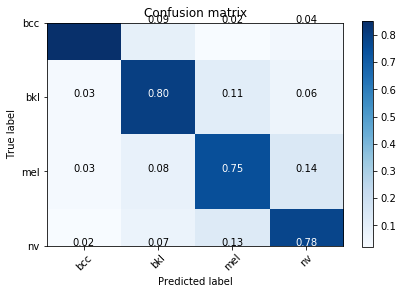

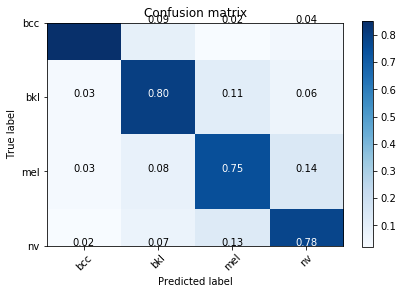

In [98]:
import itertools
from sklearn.utils.multiclass import unique_labels
plot_confusion_matrix(confusion_mtx, classes=classes,normalize=True ) 


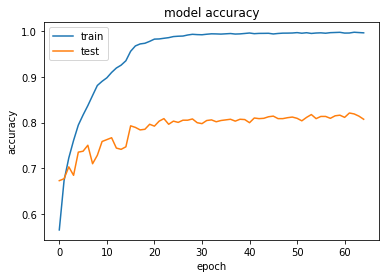

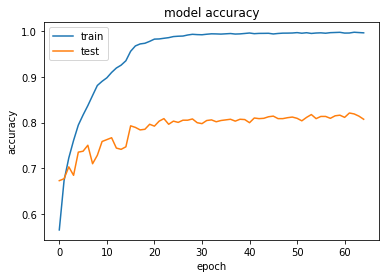

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [103]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])